# Credit Card Fraud Detection

## PROJECT
The goal of this project is to develop a machine learning model capable of identifying fraudulent credit card transactions. We will utilize a dataset containing transaction details and employ various techniques to preprocess the data, handle class imbalance, and train a classification model. The model's performance will be evaluated using relevant metrics, and strategies for improvement will be explored.

## OBJECTIVES
- Import necessary libraries and load the dataset.
- Explore and preprocess the data.
- Handle class imbalance to ensure model robustness.
- Split the dataset into training and testing sets.
- Train a classification model (e.g., Logistic Regression, Random Forest).
- Evaluate the model's performance using appropriate metrics.
- Consider techniques like oversampling or undersampling to enhance results.



### STEP 1: IMPORT NECESSARY LIBRARIES

In [68]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### STEP 2: LOADING THE DATASET

In [72]:
# Load the dataset
dataset_path = "card.csv"
data = pd.read_csv(dataset_path)# Explore the dataset





### STEP 3: PERFORMING EXPLORATORY DATA ANALYSIS:

In [74]:
print(data.head())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [22]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [23]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Class
0    284315
1       492
Name: count, dtype: int64


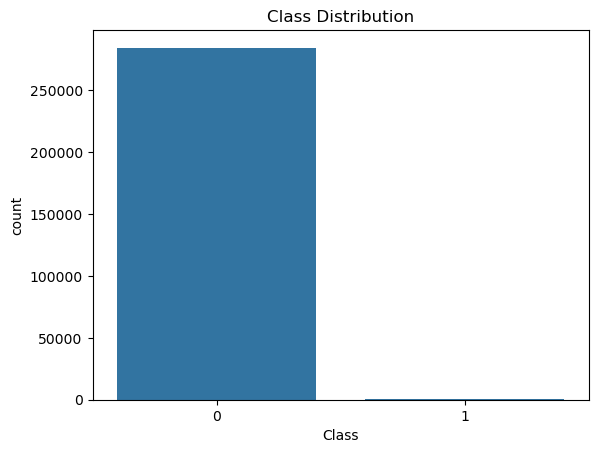

In [24]:
# Check class distribution
print(data['Class'].value_counts())

# Visualize class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

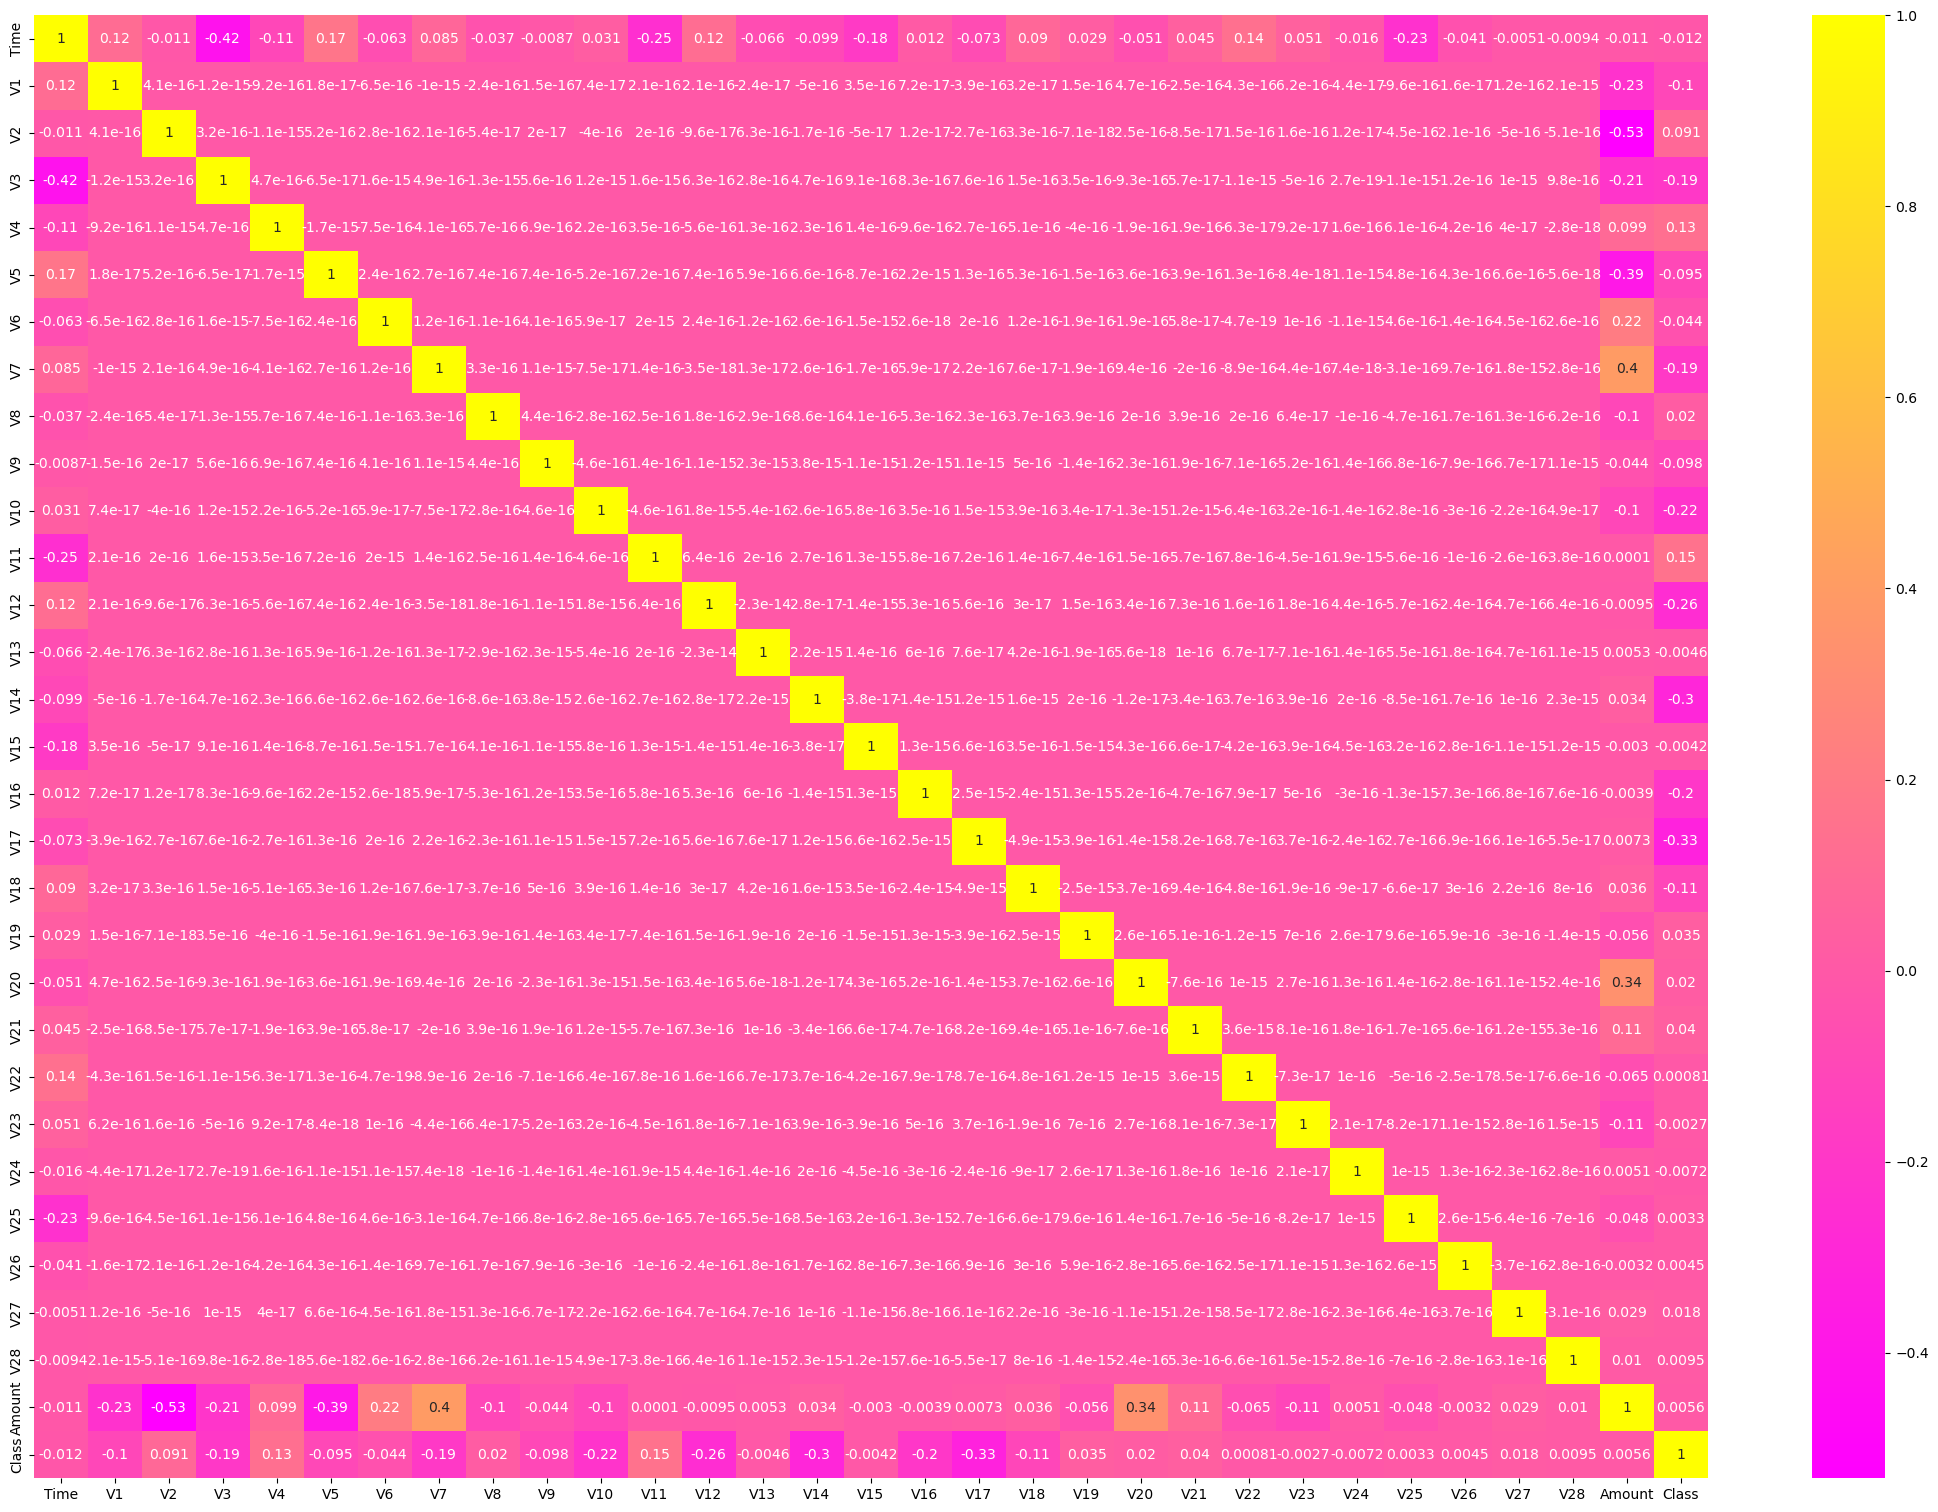

In [25]:
corr = data.corr()
corr
# plotting the heatmap for the correlation
plt.figure(figsize=(27,19))
sns.heatmap(corr, cmap = 'spring', annot= True )
plt.show()

### STEP 4: VISUALIZE FEATURE DISTRIBUTIONS

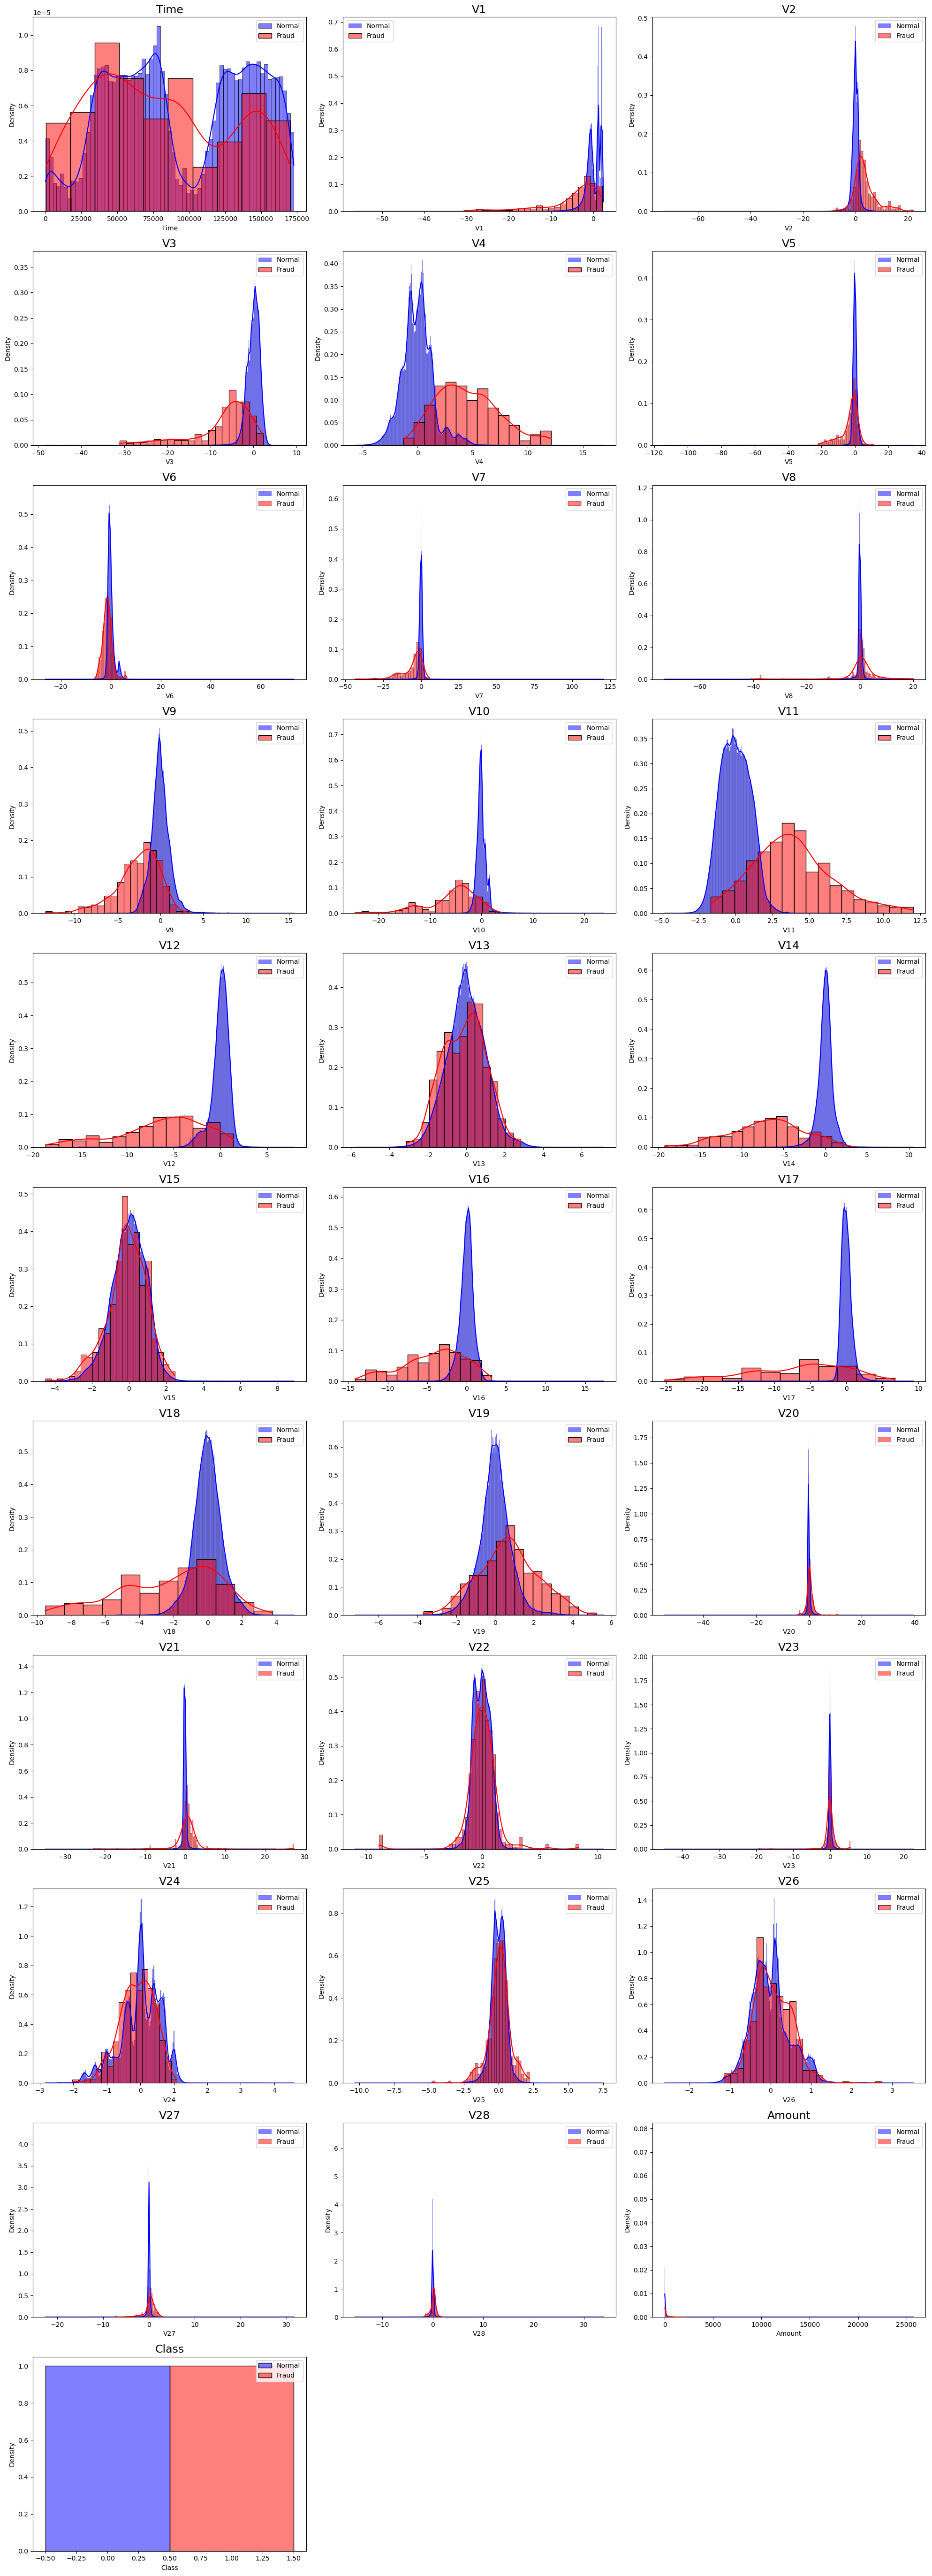

In [26]:
# Accumulating all the column names under one variable
cols = list(data.columns.values)
normal_entries = data[data['Class'] == 0]
fraud_entries = data[data['Class'] == 1]

# Determine the number of columns and rows for subplots
num_cols = 3
num_rows = -(-len(cols) // num_cols)  # Ceiling division to determine the number of rows

plt.figure(figsize=(20, num_rows * 5))  # Adjust figure size based on the number of rows

for n, col in enumerate(cols):
    plt.subplot(num_rows, num_cols, n+1)
    sns.histplot(normal_entries[col], color='blue', kde=True, stat='density', label='Normal')
    sns.histplot(fraud_entries[col], color='red', kde=True, stat='density', label='Fraud')
    plt.title(col, fontsize=17)
    plt.legend()

plt.tight_layout()
plt.show()

### STEP 5: DATA SCALING AND FEATURE SELECTION

In [27]:
from sklearn.preprocessing import StandardScaler
# Scale numerical features
scaler = StandardScaler()
data['Amount_Scaled'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Select relevant features for PCA
features = ['Time', 'V1', 'V2', 'V3', 'Amount_Scaled']
X = data[features]
y = data['Class']

### STEP 6: NORMALIZE DATA AND SPLIT INTO TRAIN AND TEST SETS

In [82]:
# Normalize data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)




### STEP 7: HANDLING CLASS IMBALANCE USING SMOTE

#### The dataset shows a significant imbalance between the classes:
- **Class 0 (Legitimate Transactions)**: There are 284,315 instances of legitimate transactions, making up the vast majority of the dataset.
- **Class 1 (Fraudulent Transactions)**: There are only 492 instances of fraudulent transactions, representing a very small fraction of the dataset.

 - *This imbalance indicates that the model will be trained on a dataset where legitimate transactions vastly outnumber fraudulent ones. Such imbalances can lead to a model that is biased towards the majority class, which is why techniques like SMOTE are used to address this imbalance by generating synthetic samples for the minority class.*

 - *SMOTE (Synthetic Minority Over-sampling Technique) is used to address class imbalance by generating synthetic samples for the minority class. This technique helps to create a more balanced dataset by increasing the number of instances in the underrepresented class.*


In [95]:
from imblearn.over_sampling import SMOTE
# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_r, y_r = smote.fit_resample(X_train, y_train)

### STEP 8: MODEL TRAINING, EVALUATION, AND VISUALIZATION

Logistic Regression Accuracy: 0.9412415294406797
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56864
           1       0.02      0.83      0.05        98

    accuracy                           0.94     56962
   macro avg       0.51      0.88      0.51     56962
weighted avg       1.00      0.94      0.97     56962

Confusion Matrix:
[[53534  3330]
 [   17    81]]


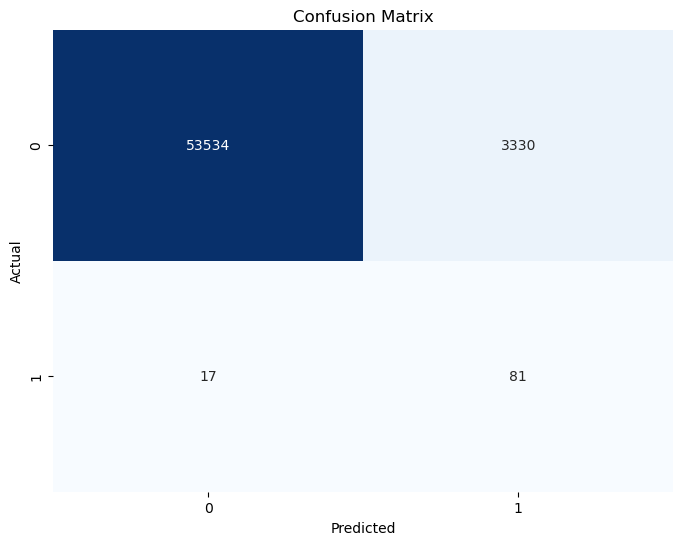

Logistic Regression
Predicted Probabilities:
Sample 1: True Label: 1,Predicted Label:1, Probability of Legitimate: 0.0000, Probability of Fraudulent: 1.0000

Sample 2: True Label: 0,Predicted Label:0, Probability of Legitimate: 0.8345, Probability of Fraudulent: 0.1655

Sample 3: True Label: 0,Predicted Label:0, Probability of Legitimate: 0.7947, Probability of Fraudulent: 0.2053

Sample 4: True Label: 0,Predicted Label:0, Probability of Legitimate: 0.7193, Probability of Fraudulent: 0.2807

Sample 5: True Label: 0,Predicted Label:0, Probability of Legitimate: 0.9218, Probability of Fraudulent: 0.0782

Sample 6: True Label: 0,Predicted Label:0, Probability of Legitimate: 0.9361, Probability of Fraudulent: 0.0639

Sample 7: True Label: 0,Predicted Label:0, Probability of Legitimate: 0.9042, Probability of Fraudulent: 0.0958

Sample 8: True Label: 0,Predicted Label:0, Probability of Legitimate: 0.8293, Probability of Fraudulent: 0.1707

Sample 9: True Label: 0,Predicted Label:0, Probabil

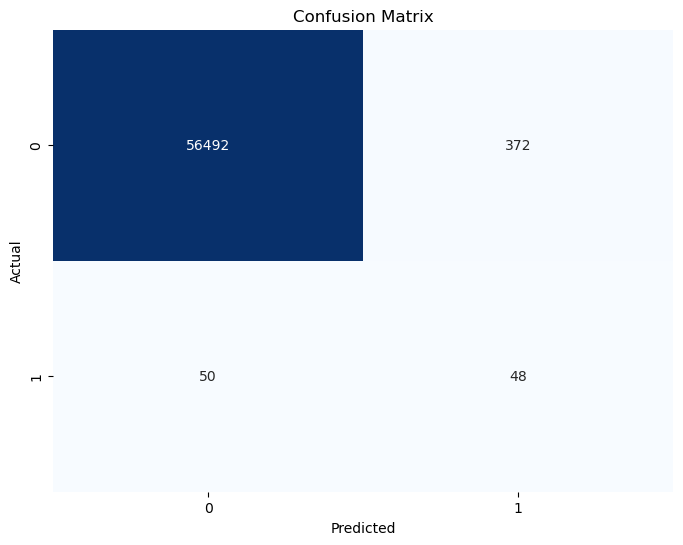

Decision Tree
Predicted Probabilities:
Sample 1: True Label: 1,Predicted Label:1, Probability of Legitimate: 0.0000, Probability of Fraudulent: 1.0000

Sample 2: True Label: 0,Predicted Label:0, Probability of Legitimate: 1.0000, Probability of Fraudulent: 0.0000

Sample 3: True Label: 0,Predicted Label:0, Probability of Legitimate: 1.0000, Probability of Fraudulent: 0.0000

Sample 4: True Label: 0,Predicted Label:0, Probability of Legitimate: 1.0000, Probability of Fraudulent: 0.0000

Sample 5: True Label: 0,Predicted Label:0, Probability of Legitimate: 1.0000, Probability of Fraudulent: 0.0000

Sample 6: True Label: 0,Predicted Label:0, Probability of Legitimate: 1.0000, Probability of Fraudulent: 0.0000

Sample 7: True Label: 0,Predicted Label:0, Probability of Legitimate: 1.0000, Probability of Fraudulent: 0.0000

Sample 8: True Label: 0,Predicted Label:0, Probability of Legitimate: 1.0000, Probability of Fraudulent: 0.0000

Sample 9: True Label: 0,Predicted Label:0, Probability of

In [64]:
# Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier()
  
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_r, y_r)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    conf_mat = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_mat)
    # Visualizing confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print the model name and predicted probabilities
    print(f"{model_name}")
    print("Predicted Probabilities:")
    # Use the correct variable name for predicted probabilities
    y_pred_proba_ = model.predict_proba(X_test)
    # Print the probabilities for each sample
    # Limit the number of samples to print
    num_samples_to_print = 10  # Adjust as needed
    for i, (true_label,pred_label, prob) in enumerate(zip(y_test,y_pred, y_pred_proba_)):
        if i >= num_samples_to_print:
            break
        print(f"Sample {i+1}: True Label: {true_label},Predicted Label:{pred_label}, Probability of Legitimate: {prob[0]:.4f}, Probability of Fraudulent: {prob[1]:.4f}")
        print()

### STEP 8: RESULTS SUMMARY

In [30]:
results = pd.DataFrame({
    'Model': ['Decision Tree','Logistic Regression'],
    'Score': [0.9924,0.9412]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.9924,Decision Tree
0.9412,Logistic Regression


## CONCLUSION

#### Logistic Regression
- **Accuracy**: 94.12%
- **Precision**: High for class 0 (legitimate transactions), but very low for class 1 (fraudulent transactions).
- **Recall**: Excellent for class 1, indicating that it detects a high percentage of fraudulent transactions but has a low precision.
- **F1-Score**: Shows a trade-off between precision and recall, with a low value for fraudulent transactions.


#### Decision Tree
- **Accuracy**: 99.26%
- **Precision**: Very high for class 0, but low for class 1.
- **Recall**: Significantly higher for class 1 compared to Logistic Regression, indicating better detection of fraudulent transactions.
- **F1-Score**: Shows improved balance between precision and recall for fraudulent transactions.


**Overall Comparison**:
- The Decision Tree model outperforms Logistic Regression in accuracy, showing better overall performance in distinguishing between legitimate and fraudulent transactions.
- Logistic Regression demonstrates high accuracy but struggles with false positives for fraudulent transactions.
- The Decision Tree provides a more balanced approach in terms of recall for fraudulent transactions, though with lower precision for the minority class.

*The Decision Tree model is preferred due to its higher accuracy and better balance in detecting fraudulent transactions.*